# Semantic Legal Searcher Evaluation

# 0. Import

In [ ]:
! pip install transformers
! pip install -U sentence-transformers
! pip install sentencepiece
! pip install faiss-gpu
! pip install funcy pickle5

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

from sentence_transformers import SentenceTransformer, util

# 1. Load Parallel Clusted Clean Korean Legal Corpus(CKLC)

In [ ]:
# 1. Load Parallel Clustered DataFrame
new_df = pd.read_csv('./data/clusted_df.csv')

# 2. Random 10 Queries
random_q = [
            '음주 운전',     # Drunk Driving
            '전세금 반환',   # Return of deposit
            '성폭력 강간',   # Sexual assault rape
            '생계형 절도',   # Criminal Livelihood
            '형사 미성년자', # Juvenile delinquency
            # My car collided with a vehicle in the next lane while trying to avoid another vehicle changing from lane 1 to 2.
            '1차선에서 2차선으로 바꾸는 차량을 피하려다가 옆 차선 차와 충돌하였습니다.',
            # The tenant does not pay rent to me, the landlord, for 3 months.
            '세입자가 3개월째 집주인인 저에게 월세를 주지 않습니다.',                     
            # I have been mentally harmed by an illegally installed camera in the bathroom.
            '화장실에 카메라를 설치하여 피해를 보았습니다.',                              
            # I couldn’t make a meal for three days in a row, so I got starved and stole bread from the bakery.
            '3일째 끼니를 해결하지 못해 배고픈 나머지 빵집에서 빵을 훔쳤습니다.',         
            # Juveniles who had known that they weren’t entitled to criminal punishment deliberately committed violent crimes.
            '형사처분을 받지 않는다는 것을 알고 형사 미성년자들이 고의로 폭력 범죄를 저질렸습니다.' 
            ]

# 2. Baseline Retrievers (KLUE)

In [ ]:
from models.semantic_law_search import *

## 2-1. KLUE BERT-base

In [ ]:
# Pre-trained Models
# KLUE BERT-based
my_model = 'klue/bert-base'

law_bert = KoLawBERT(
    dataframe= new_df,
    tgt_col = 'judgment_summary',
    model_name = my_model,
    use_sentence_bert = True,
    cluster = True
                     )

# Build the Index
# (Strategy 1) : Calculate Vector Similarity with All text embeddings
index_1 = law_bert.all_relevant_embedding()

# Results
for i, my_query in enumerate(random_q):
    original_outputs, _ = law_bert.search(
    user_query = my_query,
    top_k = 20,
    index = index_1
    )

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/klue_bert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/1967 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (62919, 768)

 === Calculate run time : 91.6309 ms === 

>> Write your case : 음주 운전

 >> Top 1 - Case name (Number) : 소유권이전등기말소 (72다2128)  
 | Cluster : 16 
 | Cluster's Topics (Keywords) : [('파기한', 0.24376166416041725), ('원심판결을', 0.2175109099889766), ('위법이', 0.13477711293646458), ('있다하여', 0.10168473688168199), ('사례', 0.0876496218912402), ('심리미진', 0.08685615738779846), ('심리미진의', 0.05983202863246469), ('채증법칙', 0.056193281483817956), ('채증법칙을', 0.05111927935564212), ('채증법칙위반의', 0.048405010965693517), ('인정한', 0.04241916185450325), ('이유로', 0.04237714298948176), ('위법을', 0.04118952160605442), ('채증법칙위배의', 0.04101944258823036), ('하여', 0.03991794059063115), ('저질렀다고', 0.0353130636813408), ('선고한', 0.0312860718449781), ('채증법칙위배', 0.030954561473667257), ('심리미진과', 0.0290722380535802), ('채증법칙에', 0.02858865085876075)] 
 | Date : 19721226.0 | Judgment Issue : 석명권 불행사로 심리미진의 위법이 있는 실례 
 | Judgment Summary : 석명권 불행사로 심리미진의 위법이 있는 실례

 >> Top 2 - Case name

## 2-2. KLUE RoBERTa-base

In [ ]:
# KLUE RoBERTa-based
my_model = 'klue/bert-base'

law_bert = KoLawBERT(
    dataframe= new_df,
    tgt_col = 'judgment_summary',
    model_name = my_model,
    use_sentence_bert = True,
    cluster = True
                     )

# Build the Index
# (Strategy 1) : Calculate Vector Similarity with All text embeddings
index_1 = law_bert.all_relevant_embedding()

# Results
for i, my_query in enumerate(random_q):
    original_outputs, _ = law_bert.search(
    user_query = my_query,
    top_k = 20,
    index = index_1
    )

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/klue_bert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/1967 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (62919, 768)

 === Calculate run time : 78.7985 ms === 

>> Write your case : 음주 운전

 >> Top 1 - Case name (Number) : 소유권이전등기말소 (72다2128)  
 | Cluster : 16 
 | Cluster's Topics (Keywords) : [('파기한', 0.24376166416041725), ('원심판결을', 0.2175109099889766), ('위법이', 0.13477711293646458), ('있다하여', 0.10168473688168199), ('사례', 0.0876496218912402), ('심리미진', 0.08685615738779846), ('심리미진의', 0.05983202863246469), ('채증법칙', 0.056193281483817956), ('채증법칙을', 0.05111927935564212), ('채증법칙위반의', 0.048405010965693517), ('인정한', 0.04241916185450325), ('이유로', 0.04237714298948176), ('위법을', 0.04118952160605442), ('채증법칙위배의', 0.04101944258823036), ('하여', 0.03991794059063115), ('저질렀다고', 0.0353130636813408), ('선고한', 0.0312860718449781), ('채증법칙위배', 0.030954561473667257), ('심리미진과', 0.0290722380535802), ('채증법칙에', 0.02858865085876075)] 
 | Date : 19721226.0 | Judgment Issue : 석명권 불행사로 심리미진의 위법이 있는 실례 
 | Judgment Summary : 석명권 불행사로 심리미진의 위법이 있는 실례

 >> Top 2 - Case name

## 2-3. KLUE RoBERTa-large

In [ ]:
# KLUE RoBERTa-large
my_model = 'klue/roberta-large'

law_bert = KoLawBERT(
    dataframe= new_df,
    tgt_col = 'judgment_summary',
    model_name = my_model,
    use_sentence_bert = True,
    cluster = True
                     )

# Build the Index
# (Strategy 1) : Calculate Vector Similarity with All text embeddings
index_1 = law_bert.all_relevant_embedding()

# Results
for i, my_query in enumerate(random_q):
    original_outputs, _ = law_bert.search(
    user_query = my_query,
    top_k = 20,
    index = index_1
    )

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/752k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/klue_roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/klue_roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']

Batches:   0%|          | 0/1967 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (62919, 1024)

 === Calculate run time : 108.9959 ms === 

>> Write your case : 음주 운전

 >> Top 1 - Case name (Number) : 가옥 명도등 (69다487,488)  
 | Cluster : 23 
 | Cluster's Topics (Keywords) : [('소송의', 0.038992301369008026), ('피고에', 0.026998843749591637), ('참가인의', 0.021722164003359704), ('소송에', 0.020487541690975424), ('민사소송법', 0.019992500026634153), ('피고', 0.018155597994526578), ('권리임을', 0.017482547301175766), ('양립할', 0.017448263056707113), ('참가인은', 0.01632786165296748), ('참가인이', 0.016018575841691165), ('독립당사자참가는', 0.015849066922367056), ('주장하거나', 0.01580650314048207), ('전부나', 0.01575632269372085), ('청구를', 0.015287198510825953), ('해결하려는', 0.014787410447425198), ('모순', 0.014599711595612547), ('판결로써', 0.014597166441500511), ('원고와', 0.013396962044714538), ('자기의', 0.01318821834632229), ('서로', 0.013111771047248678)] 
 | Date : 19690708.0 | Judgment Issue : 독립당사자 참가소송의 요건 
 | Judgment Summary : 독립당사자 참가소송의 요건

 >> Top 2 - Case name (Number) :

# 3. KoLawBERT Retrievers (Ours)

In [ ]:
from models.semantic_law_search import *

## 3-1. BERT-based KoLawBERT

In [ ]:
# Pre-trained Models
# BERT-based KoLawBERT
my_model = 'output/BERT_based_KoLawBERT'

law_bert = KoLawBERT(
    dataframe= new_df,
    tgt_col = 'judgment_summary',
    model_name = my_model,
    use_sentence_bert = True,
    cluster = True
                     )

# Build the Index
# (Strategy 1) : Calculate Vector Similarity with All text embeddings
index_1 = law_bert.all_relevant_embedding()

# Results
for i, my_query in enumerate(random_q):
    original_outputs, _ = law_bert.search(
    user_query = my_query,
    top_k = 20,
    index = index_1
    )

Batches:   0%|          | 0/1967 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (62919, 768)

 === Calculate run time : 89.8788 ms === 

>> Write your case : 음주 운전

 >> Top 1 - Case name (Number) : 도로교통법위반(음주운전) (2004도5257)  
 | Cluster : 358 
 | Cluster's Topics (Keywords) : [('음주측정을', 0.07359212514319269), ('술에', 0.0679540664306066), ('운전자가', 0.05758607385001095), ('취한', 0.05695264622236073), ('도로교통법', 0.0463201755910708), ('경찰공무원의', 0.04456425368736526), ('이유가', 0.04415436321366603), ('상당한', 0.03851023371707701), ('제41조', 0.03633714504392863), ('만한', 0.035716601333283776), ('음주측정', 0.03557288520767048), ('측정에', 0.03536726085617962), ('교통안전과', 0.034235371690942464), ('운전하였다고', 0.033244502700712684), ('인정할', 0.03221691560111604), ('운전자의', 0.030190282859937204), ('제107조의2', 0.030146732939836534), ('음주측정불응죄가', 0.029304065723439607), ('상태에', 0.028480689391456027), ('음주측정에', 0.027487059813062847)] 
 | Date : 20041112.0 | Judgment Issue : 주취운전과 음주측정거부의 각 도로교통법위반죄의 죄수관계 실체적 경합 
 | Judgment Summary : 도로교통법 제107조의2 제2호 음

## 3-2. RoBERTa-based KoLawBERT

In [ ]:
# Pre-trained Models
# RoBERTa-based KoLawBERT
my_model = 'output/Roberta_based_KoLawBERT'

law_bert = KoLawBERT(
    dataframe= new_df,
    tgt_col = 'judgment_summary',
    model_name = my_model,
    use_sentence_bert = True,
    cluster = True
                     )

# Build the Index
# (Strategy 1) : Calculate Vector Similarity with All text embeddings
index_1 = law_bert.all_relevant_embedding()

# Results
for i, my_query in enumerate(random_q):
    original_outputs, _ = law_bert.search(
    user_query = my_query,
    top_k = 20,
    index = index_1
    )


 === Calculate run time : 77.9431 ms === 

>> Write your case : 음주 운전

 >> Top 1 - Case name (Number) : 손해배상청구사건 (81나558)  
 | Cluster : 25 
 | Cluster's Topics (Keywords) : [('피보험자가', 0.03295660753641169), ('피보험자의', 0.03072531390224095), ('대인배상', 0.024603604535698605), ('자동차의', 0.02027805703321342), ('피보험자동차를', 0.018435112895879194), ('보험자가', 0.018405408689854134), ('사고로', 0.01804959707360006), ('자동차를', 0.017848077535160472), ('보험금', 0.016693179932799382), ('자동차', 0.01664213102668094), ('보험계약자나', 0.01566007379043429), ('무보험자동차에', 0.015035743562319603), ('자동차에', 0.014871986537659688), ('자동차손해배상', 0.013609875832817322), ('보장법', 0.012739391034251674), ('피보험자동차의', 0.012465531714046433), ('입은', 0.012118010596821514), ('의한', 0.01134993546608103), ('보험자의', 0.01107547791610995), ('보험금을', 0.010847109363824218)] 
 | Date : 19810319.0 | Judgment Issue : 피고의 손해배상액 감액주장이 이유없다고 한 예 
 | Judgment Summary : 이건 사고 승용차가 한국자동차 보험주식회사에 종합보험으로 가입되어 있어서 위 보험회사가 위 승용차의 운행으로 인한 손해에 대하여 무한의 책임을 지게 되어 있으므로 피고의

# 4. Evaluation Results (*Rank-less-Recommendation-metrics*)

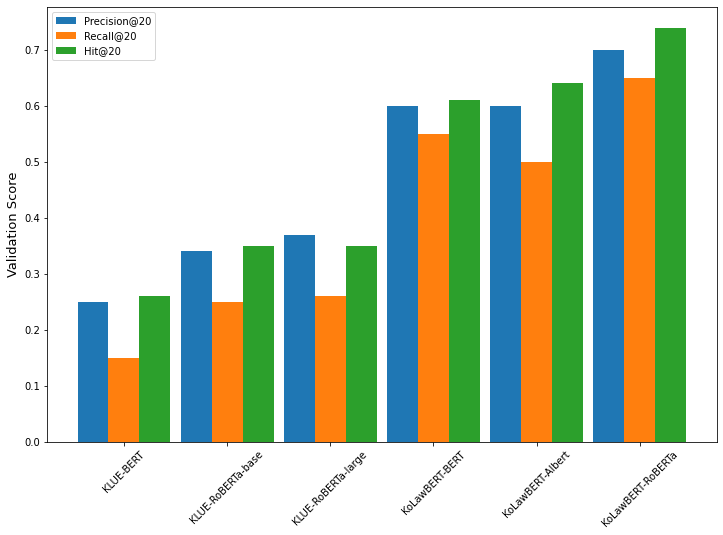

In [ ]:
eval = pd.DataFrame(columns=["P@20", "R@20", "Hit@20"])
eval["model_name"] = ["KLUE-Bert", "KLUE-Roberta-base", "KLUE-Roberta-large", "KoLawBERT-Bert", "KoLawBERT-Albert", "KoLawBERT-Roberta"]

eval = {"KLUE-BERT" : [0.25,0.15,0.26],
        "KLUE-RoBERTa-base" : [0.34, 0.25, 0.35],
        "KLUE-RoBERTa-large": [0.37, 0.26, 0.35],
        "KoLawBERT-BERT": [0.60, 0.55, 0.61],
        "KoLawBERT-Albert": [0.60, 0.50, 0.64],
        "KoLawBERT-RoBERTa": [0.70, 0.65, 0.74],
        }

val_p = [v[0] for v in eval.values()]
val_r = [v[1] for v in eval.values()]
val_h = [v[2] for v in eval.values()]

width = 0.3
x = np.arange(len(eval))
plt.figure(figsize=(12, 8))
plt.bar(x-0.3, val_p, width, label='Precision@20')
plt.bar(x, val_r, width, label='Recall@20')
plt.bar(x+0.3, val_h, width, label='Hit@20')
plt.xticks(ticks=x, labels=eval.keys(), rotation=45)
plt.ylabel(f'Validation Score', fontsize=13)
_ = plt.legend()